In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
import keras
from keras.preprocessing import image
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.models import load_model
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VItt1OxLhBXUT66id6qK8fMFDvQOoWkg98AnmgErgAf5',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'vegmodel-donotdelete-pr-1n60gwqj0qqahv'
object_key = 'Veg-dataset.zip'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [5]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_3.read()), "r")
file_paths = unzip.namelist() 
for path in file_paths:
    unzip.extract(path)

In [6]:
pwd

'/home/wsuser/work'

In [7]:
os.listdir('/home/wsuser/work/Veg-dataset/train_set')

['Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Potato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Late_blight',
 'Potato___Early_blight',
 'Pepper,_bell___Bacterial_spot',
 'Potato___Late_blight',
 'Pepper,_bell___healthy']

In [8]:
train_datagen=ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
train=train_datagen.flow_from_directory('/home/wsuser/work/Veg-dataset/train_set',target_size=(256,256),batch_size=32)

val=val_datagen.flow_from_directory('/home/wsuser/work/Veg-dataset/test_set',target_size=(256,256),batch_size=32)

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [10]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
import scipy

In [12]:
t_img,label=train.next()

In [13]:
t_img.shape

(32, 256, 256, 3)

In [14]:
def plotImage(imgarr,label):
      for im,l in zip(imgarr,label):         
            plt.figure(figsize=(5,5))
            plt.imshow(im/255)
            plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


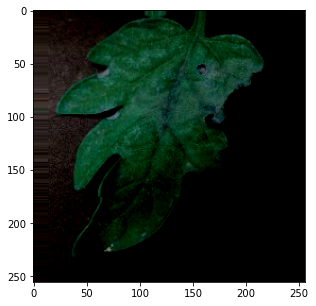

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


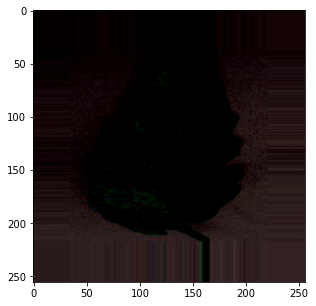

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


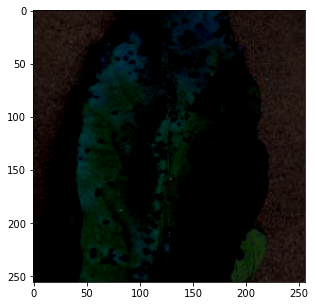

In [15]:
plotImage(t_img[:3],label[:3])

In [16]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [17]:
base_model=VGG19(input_shape=(256,256,3),include_top=False)

80150528/80134624 [==============================] - 1s 0us/step


In [18]:
for layer in base_model.layers:
    layer.trainable=False

In [19]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
X=Flatten()(base_model.output)
X=Dense(units=9,activation='softmax')(X)

model=Model(base_model.input,X)

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [22]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

es=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1)

mc=ModelCheckpoint(filepath='veg_model.h5',monitor='val_accuracy',min_delta=0.01,patience=3,verbose=1,save_best_only=True)


cb=[es,mc]

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [25]:
model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

/tmp/wsuser/ipykernel_164/1613728924.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train,steps_per_epoch=16,epochs=50,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 12.9096 - accuracy: 0.4297 
Epoch 00001: val_accuracy improved from -inf to 0.66211, saving model to veg_model.h5
16/16 [==============================] - 401s 26s/step - loss: 12.9096 - accuracy: 0.4297 - val_loss: 7.8048 - val_accuracy: 0.6621
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 6.2608 - accuracy: 0.6855 
Epoch 00002: val_accuracy improved from 0.66211 to 0.80078, saving model to veg_model.h5
16/16 [==============================] - 398s 26s/step - loss: 6.2608 - accuracy: 0.6855 - val_loss: 3.4633 - val_accuracy: 0.8008
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 4.7518 - accuracy: 0.7383 
Epoch 00003: val_accuracy improved from 0.80078 to 0.86328, saving model to veg_model.h5
16/16 [==============================] - 396s 26s/step - loss: 4.7518 - accuracy: 0.7383 - val_loss: 2.4672 - val_accuracy: 0.8633
Epoch 4/50
16/16 [==============================] - ETA:

In [26]:
ls

Veg-dataset/  veg_model.h5


In [27]:
model.save('veg.h5')

In [28]:
!tar -zcvf veg-model_new.tgz veg.h5

veg.h5


In [29]:
ls -1

Veg-dataset/
veg.h5
veg_model.h5
veg-model_new.tgz


In [30]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 22.9 MB/s eta 0:00:01


In [31]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
                    "url": "https://us-south.ml.cloud.ibm.com",
                   "apikey":"1a1Z2nLswZNeNbc5mR4xeoAOjzVag062F0o9PkCe7nLi" 
                  }

client = APIClient(wml_credentials)

In [32]:
def guid_from_space_name(client, space_name): 
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [33]:
space_uid = guid_from_space_name(client, 'Vegetable_model') 
print("Space UID = " + space_uid)

Space UID = 6d32e153-d587-4f89-ba34-1fa3f143dc4a


In [34]:
client.set.default_space(space_uid)

'SUCCESS'

In [35]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [36]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [37]:
model_details = client.repository.store_model(model= 'veg-model_new.tgz',
    meta_props={
        client.repository.ModelMetaNames.NAME:"CNN",
        client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
        client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid}
    )

In [38]:
model_id = client.repository.get_model_id(model_details)

In [39]:
model_id

'31756789-65e0-4a20-a1f9-c3ed762be5a4'

In [40]:
ls

Veg-dataset/  veg.h5  veg_model.h5  veg-model_new.tgz


# Testing the model

In [41]:
model1=load_model('veg.h5')

In [42]:
imge=tensorflow.keras.utils.load_img(r'/home/wsuser/work/Veg-dataset/test_set/Potato___Early_blight/b6220993-c51f-48fa-bee9-fb5cb89cc0c4___RS_Early.B 7467.JPG',target_size=(256,256))

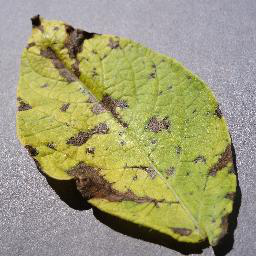

In [43]:
imge

In [44]:
x=img_to_array(imge)
im=preprocess_input(x)
image1=np.expand_dims(im,axis=0)


In [45]:
pred=np.argmax(model1.predict(image1))

In [46]:
if pred == 0:
    print ("Pepper bell Bacterial_spot")
if pred == 1:
    print (" Pepper bell healthy")
if pred == 2:
    print ("Potato Early blight")
if pred == 3:
    print ("Potato___healthy")
if pred == 4:
    print ("Potato Late blight")
if pred == 5:
    print ("Tomato Bacterial spot")
if pred == 6:
    print ("Tomato Late blight")
if pred == 7:
    print ("Tomato Leaf Mold")
if pred == 8:
    print ("Tomato Septoria leaf spot")

Potato Early blight
